<a href="https://colab.research.google.com/github/mralamdari/Computer-Vision-Projects/blob/main/Unsupervised_Similar_Images_Finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import os
import cv2
import glob
import tqdm
import shutil
import skimage
import IPython
import matplotlib
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab.patches import cv2_imshow

!pip install patool
import patoolib

IPython.display.clear_output()

#Part 1

In [ ]:
patoolib.extract_archive("/content/drive/MyDrive/reddit_files.rar", outdir="/content/data")

Path = './data/images/'
os.rename(f"./data/{os.listdir('./data')[0]}", Path)

IPython.display.clear_output()

In [15]:
data = os.listdir(Path)
len(data)

2009

In [16]:
Path = './data/images/'
data = glob.glob(f'{Path}/*g')
videos = glob.glob(f'{Path}/*.mp4')
os.makedirs(f'{Path}/Videos/', exist_ok=True)
os.makedirs(f'{Path}/Images/', exist_ok=True)
for i, video_path in enumerate(videos):
    os.replace(video_path, f'{Path}/Videos/{i}.mp4')

In [17]:
def min_pooling(img, pad_size=20):
  image = abs(img[:, :, 0] - img[:, :, 1] - img[:, :, 2])
  max_pool_img = skimage.measure.block_reduce(image, (pad_size,pad_size), np.mean)
  return max_pool_img

In [ ]:
arr = []
height_arr, weight_arr = [], []
for d in tqdm.tqdm(data):
  try:
      img = cv2.imread(d)
      height_arr.append(img.shape[0])
      weight_arr.append(img.shape[1])
      img = cv2.resize(img, (1000, 1000))
      img = min_pooling(img, pad_size=25)
      img = np.ravel(img)
      arr.append(img)
  except:
    print(d)

print('\n')
print('Height Mean:',np.mean(height_arr), 'Height Min:',np.min(height_arr), 'Height Max:',np.max(height_arr))
print('Height Mean:',np.mean(weight_arr), 'Height Min:',np.min(weight_arr), 'Height Max:',np.max(weight_arr))

 59%|█████▉    | 1164/1970 [00:42<00:36, 22.37it/s]

In [ ]:
mae_arr = []
for i, A in tqdm.tqdm(enumerate(arr)):
  temp = []
  mean_mae_arr = [(abs(A - b)).mean() for b in arr]
  for j, mae in enumerate(mean_mae_arr):
    if mae < 10:
        temp.append(data[j])
  mae_arr.append(temp)

In [ ]:
for id, path_list in tqdm.tqdm(enumerate(mae_arr)):
  if len(path_list) > 1:
    best_img, best_size= path_list[0], 0
    for n, p in enumerate(path_list):
        if os.path.exists(p):
            img = cv2.imread(p)
            img_size = img.shape[0] * img.shape[1]
            if img_size > best_size:
                best_img  = p
                best_size = img_size
    if os.path.exists(p):
        os.replace(best_img, f'{Path}/Images/img_{id}.jpg')
  else:
     p = path_list[0]
     if os.path.exists(p):
        os.replace(p, f'{Path}/Images/img_{id}.jpg')

#Part2

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive'
!kaggle datasets download -d jessicali9530/stanford-cars-dataset
!unzip \*.zip && rm *.zip
IPython.display.clear_output()

In [ ]:
data = glob.glob('/content/cars_train/cars_train/*.jpg')
len(data)

8144

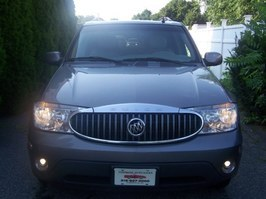

(199, 266, 3)

In [ ]:
N=0
N+=1
img = cv2.imread(data[N])
cv2_imshow(img)
img.shape

In [ ]:
os.makedirs(f'/content/dataset/', exist_ok=True)

counter = 0
for i in data[:4000]:
  for _ in range(6):
    counter += 1
    shutil.copyfile(i, f'/content/dataset/{counter}.jpg')

In [ ]:
dataset = glob.glob('/content/dataset/*.jpg')

In [ ]:
def max_pooling(img, pad_size=20):
  image = img[:, :, 0] + img[:, :, 1] + img[:, :, 2]
  max_pool_img = skimage.measure.block_reduce(image, (pad_size,pad_size), np.max)
  return max_pool_img

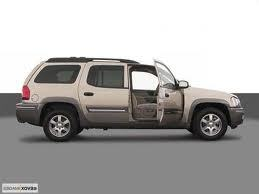

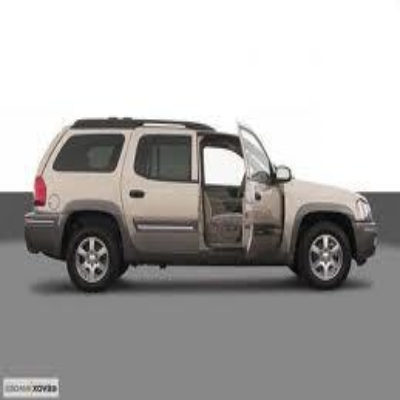

(20, 20)

In [ ]:
d = dataset[0]
img = cv2.imread(d)
cv2_imshow(img)
img = cv2.resize(img, (400, 400))
cv2_imshow(img)
img = max_pooling(img, pad_size=20)
cv2_imshow(img)
img.shape

In [ ]:
arr = []
for d in dataset:
  img = cv2.imread(d)
  img = cv2.resize(img, (400, 400))
  img = max_pooling(img, pad_size=25)
  img = np.ravel(img)
  arr.append(img)

In [ ]:
mse_arr = []
for i, A in enumerate(arr):
  temp = []
  for j, B in enumerate(arr):
    mse = ((A - B)**2).mean()
    if mse < 10 and i!=j:
      temp.append(dataset[j])
  mse_arr.append(temp)

In [ ]:
arr
#  [mse_arr[0]]
# dataset
# np.array(dataset).loc[3, 17, 42, 65, 101]
# dataset[3, 17]
# mse_arr
len(arr)

24000

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten()
])

# model.summary()
input = tf.keras.layers.Input(shape=(32, 32, 3))
net = model(input)
# keranet.summary()

#Part 3

In [ ]:
import os
import cv2
import glob
import tqdm
import skimage
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Path='.'
data = glob.glob(f'{Path}/*g')
videos = glob.glob(f'{Path}/*.mp4')
os.makedirs(f'{Path}/Videos/', exist_ok=True)
os.makedirs(f'{Path}/Images/', exist_ok=True)
for i, video_path in enumerate(videos):
    os.replace(video_path, f'{Path}/Videos/{i}.mp4')

In [ ]:
def min_pooling(img, pad_size=20):
  image = abs(img[:, :, 0] - img[:, :, 1] - img[:, :, 2])
  max_pool_img = skimage.measure.block_reduce(image, (pad_size,pad_size), np.mean)
  return max_pool_img

In [ ]:
arr = []
for d in tqdm.tqdm(data):
  try:
      img = cv2.imread(d)
      img = cv2.resize(img, (800, 800))
      img = min_pooling(img, pad_size=25)
      img = np.ravel(img)
      arr.append(img)
  except:
    print(d)

In [ ]:
mae_arr = []
for i, A in tqdm.tqdm(enumerate(arr)):
  temp = []
  mean_mae_arr = [(abs(A - b)).mean() for b in arr]
  for j, mae in enumerate(mean_mae_arr):
    if mae < 10:
        temp.append(data[j])
  mae_arr.append(temp)

In [ ]:
for id, path_list in tqdm.tqdm(enumerate(mae_arr)):
  if len(path_list) > 1:
    best_img, best_size= path_list[0], 0
    for n, p in enumerate(path_list):
        if os.path.exists(p):
            img = cv2.imread(p)
            img_size = img.shape[0] * img.shape[1]
            if img_size > best_size:
                best_img  = p
                best_size = img_size
    if os.path.exists(p):
        os.replace(best_img, f'{Path}/Images/img_{id}.jpg')
  else:
     p = path_list[0]
     if os.path.exists(p):
        os.replace(p, f'{Path}/Images/img_{id}.jpg')